****PROJECT NAME****

****IPL Data Analysis****

***Introduction***

**Data Source**= kaggle.com(.csv form)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [2]:
IPL_Match = pd.read_csv("IPL_Matches_2008-2022.csv")
IPL_Match.columns = IPL_Match.columns.str.strip()
IPL_Match.head(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma
6,1304114,Mumbai,2022-05-20,2022,68,Chennai Super Kings,Rajasthan Royals,"Brabourne Stadium, Mumbai",Chennai Super Kings,bat,N,Rajasthan Royals,Wickets,5.0,NaN,R Ashwin,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,NA Patwardhan
7,1304113,Mumbai,2022-05-19,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,N,Royal Challengers Bangalore,Wickets,8.0,NaN,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer
8,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2.0,NaN,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3.0,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit


In [3]:
IPL_Match.shape

(950, 20)

In [4]:
IPL_Match.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [5]:
IPL_Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

***Data Understanding & Cleaning***

***Missing Values***

In [6]:
IPL_Match.isna().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [7]:
IPL_Match.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [8]:
IPL_Match.nunique()

ID                 950
City                33
Date               706
Season              15
MatchNumber         80
Team1               18
Team2               18
Venue               49
TossWinner          18
TossDecision         2
SuperOver            2
WinningTeam         18
WonBy                4
Margin              94
method               1
Player_of_Match    262
Team1Players       932
Team2Players       937
Umpire1             58
Umpire2             60
dtype: int64

In [9]:
IPL_Match.drop(columns=['method','SuperOver'],inplace=True)

In [10]:
IPL_Match.shape


(950, 18)

In [11]:
IPL_Match.fillna(IPL_Match.apply(lambda x: x.mode()[0] if not x.mode().empty else x), inplace=True)


In [12]:
IPL_Match.isna().sum()

ID                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
WinningTeam        0
WonBy              0
Margin             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
dtype: int64

***Handling Missing Values***

In [13]:
IPL_Match['City'].fillna('Unknown', inplace=True)  # Replace missing City with 'Unknown'
IPL_Match['WinningTeam'].fillna('No Result', inplace=True)  # Matches with no winner
IPL_Match['Margin'].fillna(0, inplace=True)  # Assuming missing margins mean a tied match


C:\Users\HP\AppData\Local\Temp\ipykernel_18844\1743417191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  IPL_Match['City'].fillna('Unknown', inplace=True)  # Replace missing City with 'Unknown'
C:\Users\HP\AppData\Local\Temp\ipykernel_18844\1743417191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

***Detecting And Removing Outliers***

***Removing outliers***

In [14]:
Numerical_col = ['Margin']

In [15]:
z_scores = stats.zscore(IPL_Match[Numerical_col])
threshold = 10 
outliers = (z_scores > threshold) | (z_scores < -threshold)
Cleaned_data_num = IPL_Match[~outliers.any(axis=1)]


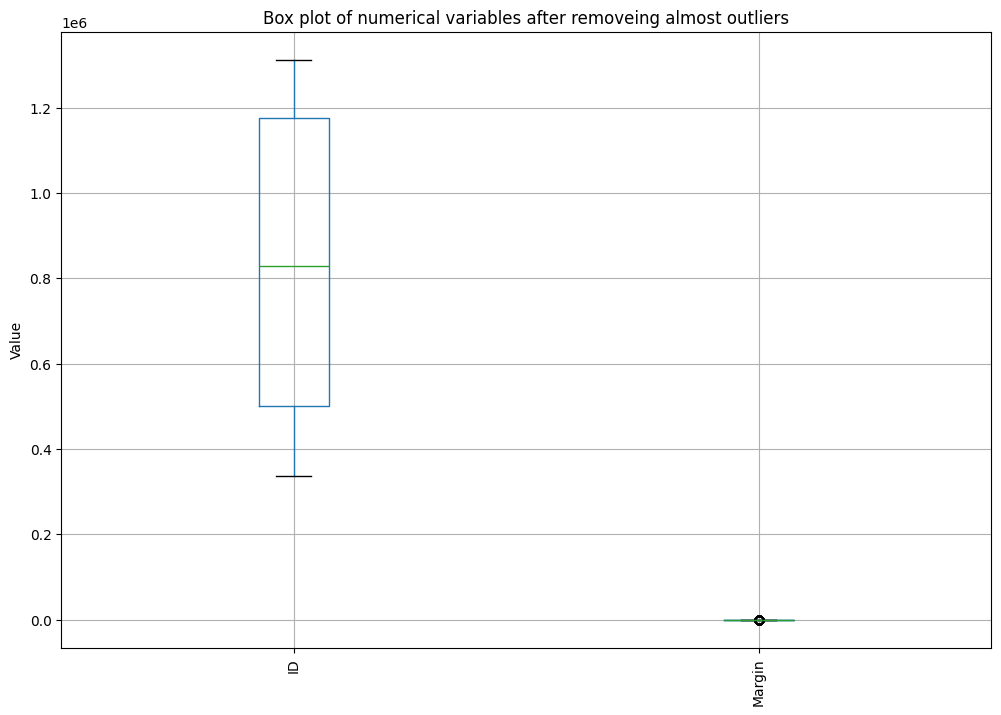

In [16]:
plt.figure(figsize=(12,8))
Cleaned_data_num.boxplot()
plt.title("Box plot of numerical variables after removeing almost outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [17]:
# Convert 'Date' column to datetime format
IPL_Match['Date'] = pd.to_datetime(IPL_Match['Date'])

In [18]:
# Extract additional time features
IPL_Match['Year'] = IPL_Match['Date'].dt.year
IPL_Match['Month'] = IPL_Match['Date'].dt.month
IPL_Match['Day_of_Week'] = IPL_Match['Date'].dt.day_name()

In [19]:
# Save the cleaned dataset
cleaned_file_path = "cleaned_IPL_Matches_2008-2022.csv.csv"
IPL_Match.to_csv(cleaned_file_path, index=False)

# Display final dataset overview
IPL_Match.info()
IPL_Match.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               950 non-null    int64         
 1   City             950 non-null    object        
 2   Date             950 non-null    datetime64[ns]
 3   Season           950 non-null    object        
 4   MatchNumber      950 non-null    object        
 5   Team1            950 non-null    object        
 6   Team2            950 non-null    object        
 7   Venue            950 non-null    object        
 8   TossWinner       950 non-null    object        
 9   TossDecision     950 non-null    object        
 10  WinningTeam      950 non-null    object        
 11  WonBy            950 non-null    object        
 12  Margin           950 non-null    float64       
 13  Player_of_Match  950 non-null    object        
 14  Team1Players     950 non-null    object   

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Year,Month,Day_of_Week
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,5,Sunday
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,5,Friday
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,5,Wednesday
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,5,Tuesday
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,5,Sunday


**what we do in Data cleaning**

->Converts Date to a datetime format. Extracts Year, Month, and Day_of_Week for time-based trends.

->Fills missing values: City → "Unknown" (since some matches may not have a listed city).
WinningTeam → "No Result" (possible rain-affected or abandoned matches).
Margin → 0 (likely a tied match).

***Exploratory Data Analysis (EDA)***

**Match Trends**

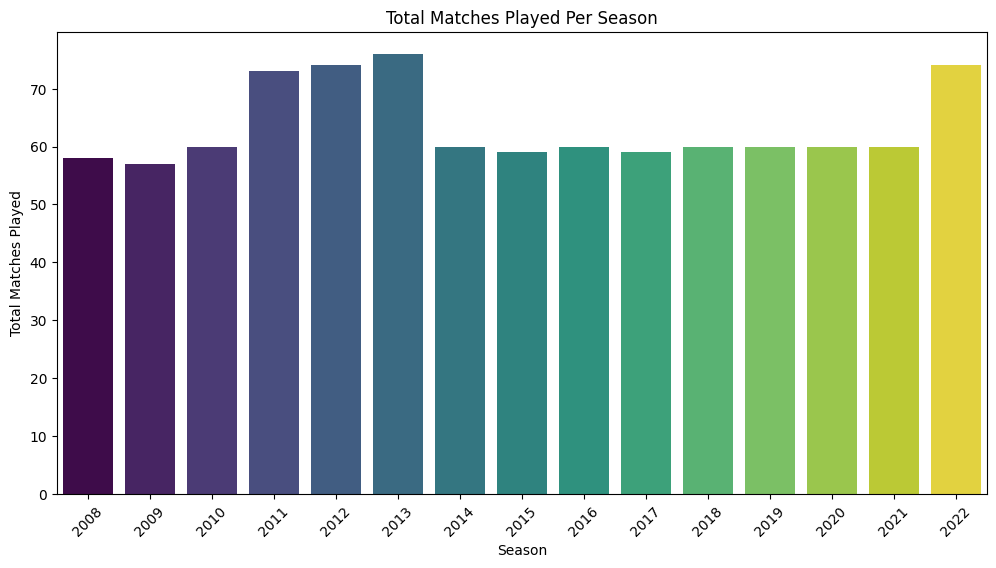

In [20]:
# Ensure 'Date' is in datetime format and extract 'Year'
IPL_Match['Date'] = pd.to_datetime(IPL_Match['Date'], errors='coerce')
IPL_Match['Year'] = IPL_Match['Date'].dt.year

# 1. Total matches played per season (Fixed)
matches_per_season = IPL_Match['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values, hue=matches_per_season.index, palette="viridis", legend=False)
plt.xlabel("Season")
plt.ylabel("Total Matches Played")
plt.title("Total Matches Played Per Season")
plt.xticks(rotation=45)
plt.show()

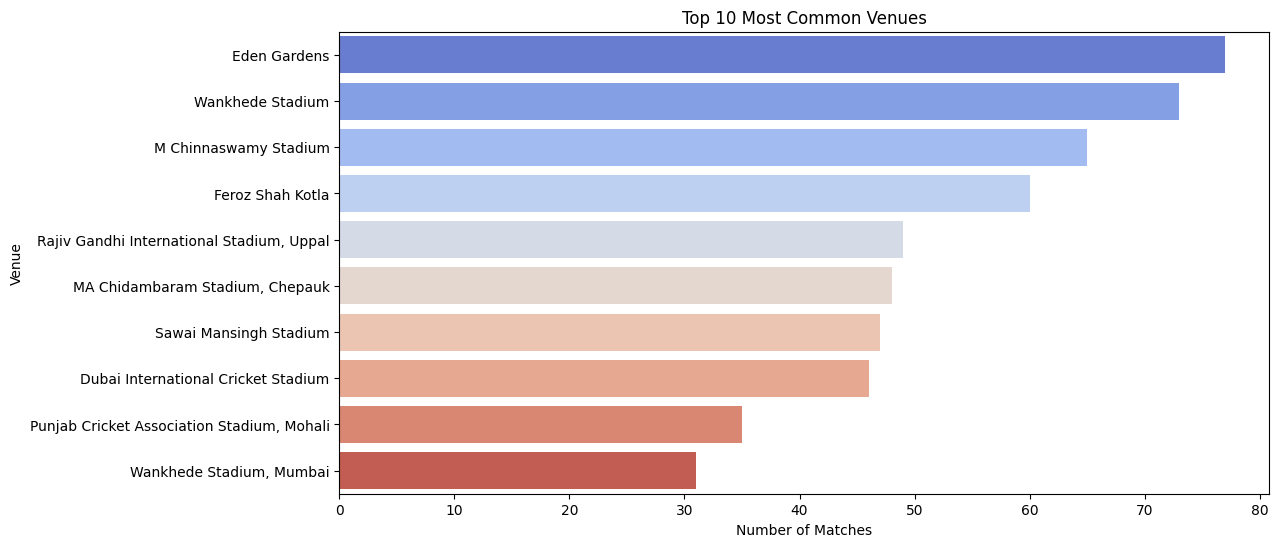

In [21]:
# 2. Most common venues for matches (Fixed)
top_venues = IPL_Match['Venue'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_venues.index, x=top_venues.values, hue=top_venues.index, palette="coolwarm", legend=False)
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.title("Top 10 Most Common Venues")
plt.show()

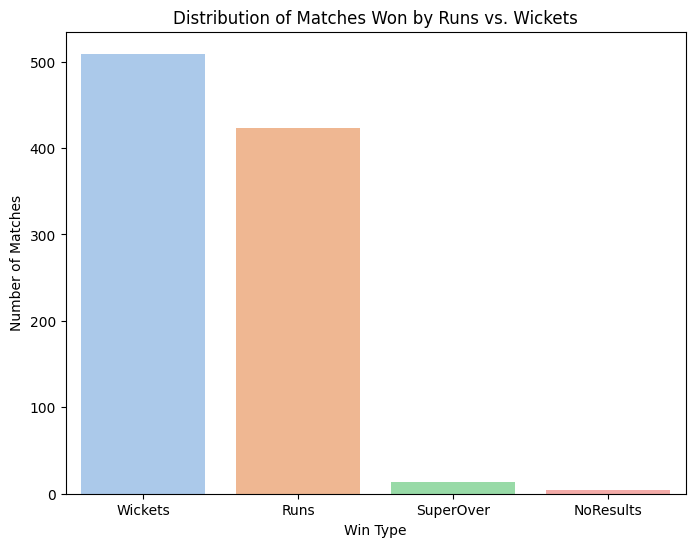

In [22]:
# 3. Distribution of matches won by runs vs. wickets (Fixed)
if 'WonBy' in IPL_Match.columns:
    win_type_counts = IPL_Match['WonBy'].value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=win_type_counts.index, y=win_type_counts.values, hue=win_type_counts.index, palette="pastel", legend=False)
    plt.xlabel("Win Type")
    plt.ylabel("Number of Matches")
    plt.title("Distribution of Matches Won by Runs vs. Wickets")
    plt.show()
else:
    print("Column 'WonBy' not found. Please check the dataset structure.")

**Team Performance Analysis**

**Most successful Team(Total wins)**

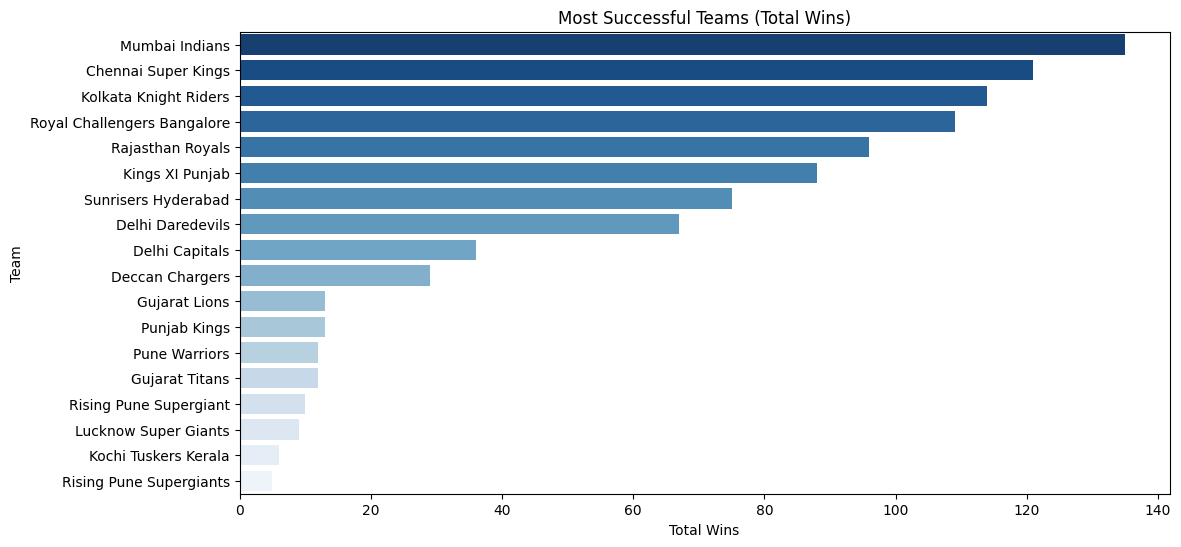

In [23]:
most_wins = IPL_Match['WinningTeam'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=most_wins.index, x=most_wins.values, hue=most_wins.index, palette="Blues_r", legend=False)
plt.xlabel("Total Wins")
plt.ylabel("Team")
plt.title("Most Successful Teams (Total Wins)")
plt.show()


**Win percentage of each team over different seasons**

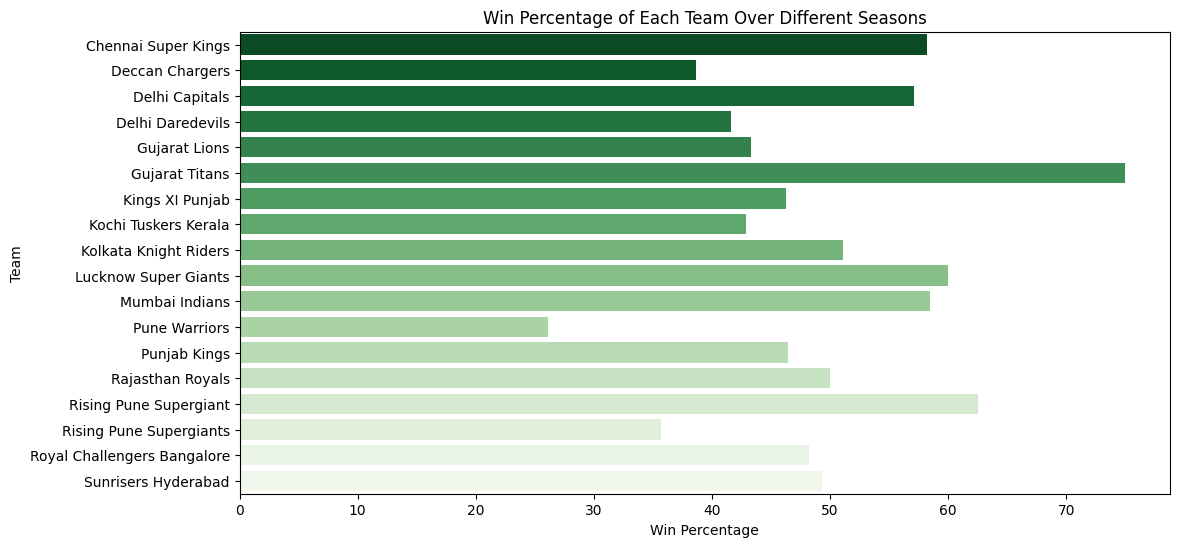

In [24]:
total_matches_per_team = IPL_Match['Team1'].value_counts() + IPL_Match['Team2'].value_counts()
win_percentage = (most_wins / total_matches_per_team) * 100

plt.figure(figsize=(12, 6))
sns.barplot(y=win_percentage.index, x=win_percentage.values,hue=win_percentage.index, palette="Greens_r")
plt.xlabel("Win Percentage")
plt.ylabel("Team")
plt.title("Win Percentage of Each Team Over Different Seasons")
plt.show()


**Performance of teams when batting first vs. chasing**

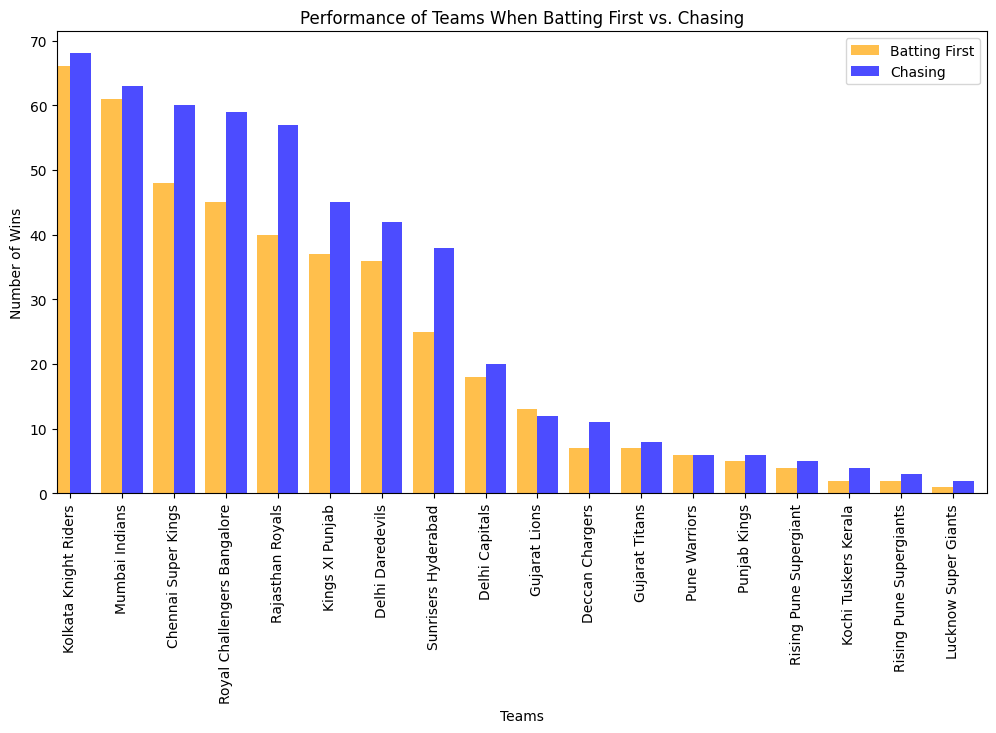

In [25]:
if 'WonBy' in IPL_Match.columns and 'WinningTeam' in IPL_Match.columns:
    batting_first_wins = IPL_Match[IPL_Match['WonBy'] == 'Runs']['WinningTeam'].value_counts()
    chasing_wins = IPL_Match[IPL_Match['WonBy'] == 'Wickets']['WinningTeam'].value_counts()

    plt.figure(figsize=(12, 6))
    batting_first_wins.plot(kind="bar", color="orange", alpha=0.7, label="Batting First", width=0.4, position=1)
    chasing_wins.plot(kind="bar", color="blue", alpha=0.7, label="Chasing", width=0.4, position=0)
    plt.xlabel("Teams")
    plt.ylabel("Number of Wins")
    plt.title("Performance of Teams When Batting First vs. Chasing")
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Required columns for batting first vs. chasing analysis are missing.")

***Toss Analysis***

**Toss decision trends (batting first vs. fielding first)**

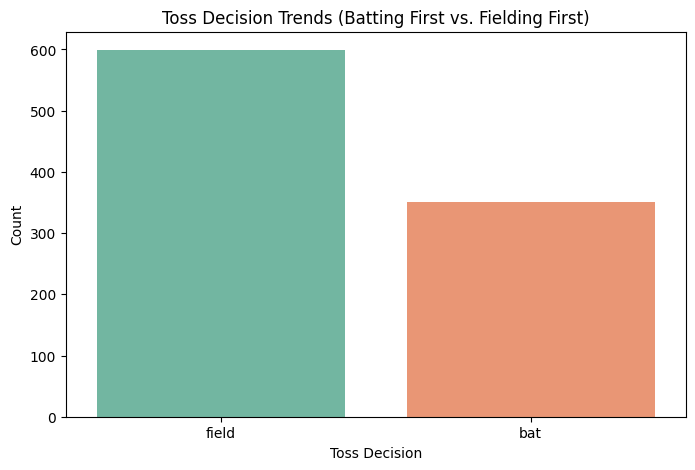

In [26]:
toss_decision_counts = IPL_Match['TossDecision'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values,hue=toss_decision_counts.index, palette="Set2")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.title("Toss Decision Trends (Batting First vs. Fielding First)")
plt.show()

**Impact of Winning the Toss on Match Results**

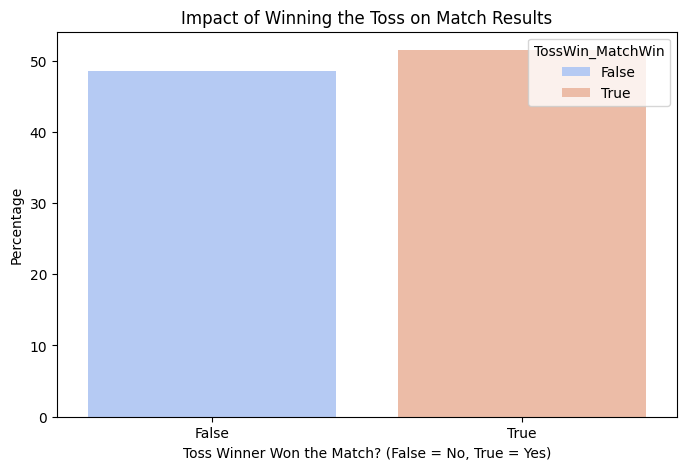

In [27]:

IPL_Match['TossWin_MatchWin'] = IPL_Match['TossWinner'] == IPL_Match['WinningTeam']
toss_impact_counts = IPL_Match['TossWin_MatchWin'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=toss_impact_counts.index, y=toss_impact_counts.values,hue=toss_impact_counts.index, palette="coolwarm")
plt.xlabel("Toss Winner Won the Match? (False = No, True = Yes)")
plt.ylabel("Percentage")
plt.title("Impact of Winning the Toss on Match Results")
plt.show()

***Super Over & Close Matches***

**Number of matches won with small margins (e.g., less than 10 runs or 2 wickets)**

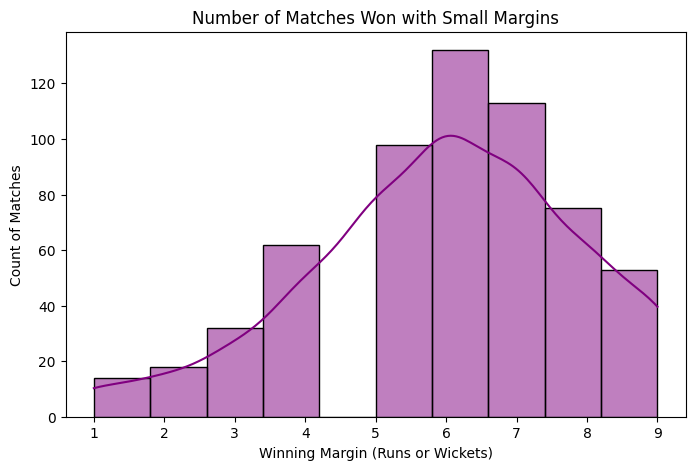

597

In [28]:

close_matches = IPL_Match[(IPL_Match['Margin'] < 10) | (IPL_Match['Margin'] == 1)]

plt.figure(figsize=(8, 5))
sns.histplot(close_matches['Margin'], bins=10, kde=True, color="purple")
plt.xlabel("Winning Margin (Runs or Wickets)")
plt.ylabel("Count of Matches")
plt.title("Number of Matches Won with Small Margins")
plt.show()

# Display number of close matches
close_matches_count = close_matches.shape[0]
close_matches_count



***Player & Umpire Analysis***

**Player Performance**

**Most "Player of the Match" awards**

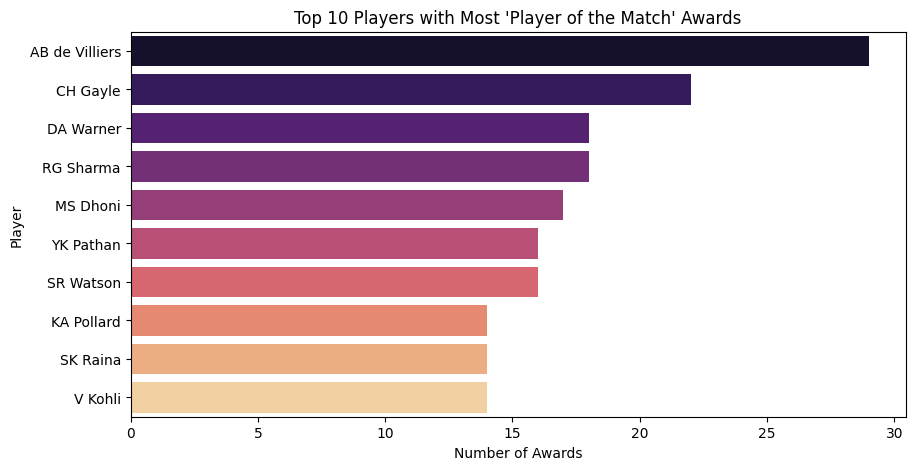

In [29]:
player_of_match_counts = IPL_Match['Player_of_Match'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=player_of_match_counts.index, x=player_of_match_counts.values, hue=player_of_match_counts.index, palette="magma")
plt.xlabel("Number of Awards")
plt.ylabel("Player")
plt.title("Top 10 Players with Most 'Player of the Match' Awards")
plt.show()


**Top performers in different seasons**

In [30]:
top_performers_per_season = IPL_Match.groupby(['Year', 'Player_of_Match']).size().reset_index(name='Awards')
top_performers_per_season = top_performers_per_season.sort_values(['Year', 'Awards'], ascending=[True, False]).groupby('Year').head(1)

# Displaying top performers per season
top_performers_per_season

,Year,Player_of_Match,Awards
28,2008,SE Marsh,5
80,2009,YK Pathan,3
121,2010,SR Tendulkar,4
133,2011,CH Gayle,6
188,2012,CH Gayle,5
253,2013,MEK Hussey,5
285,2014,GJ Maxwell,4
312,2015,AB de Villiers,4
386,2016,V Kohli,5
392,2017,BA Stokes,3


**Umpire Trends**

**Most frequently officiating umpires**

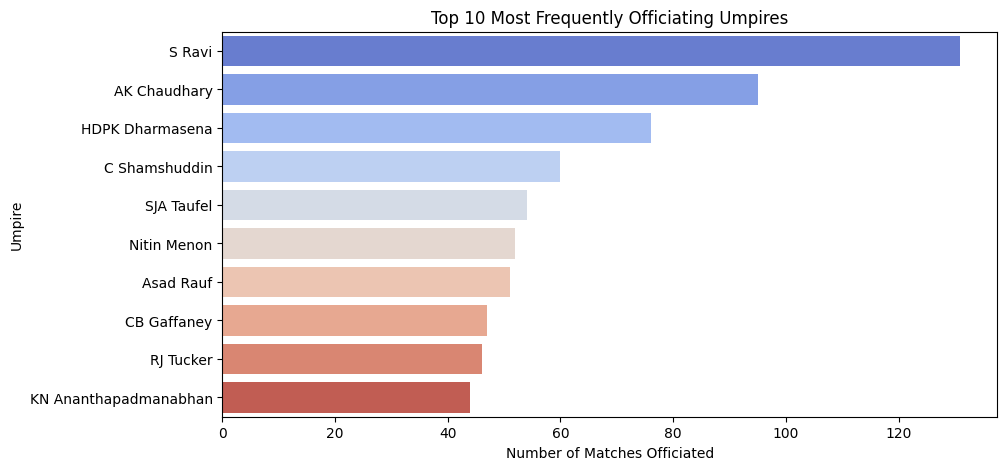

In [31]:
umpire1_counts = IPL_Match['Umpire1'].value_counts().head(10)
umpire2_counts = IPL_Match['Umpire2'].value_counts().head(10)

# Combine both umpires into a single count
umpire_combined = pd.concat([umpire1_counts, umpire2_counts]).groupby(level=0).sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=umpire_combined.index, x=umpire_combined.values,hue=umpire_combined.index, palette="coolwarm")
plt.xlabel("Number of Matches Officiated")
plt.ylabel("Umpire")
plt.title("Top 10 Most Frequently Officiating Umpires")
plt.show()


**Impact of umpire on match outcomes**


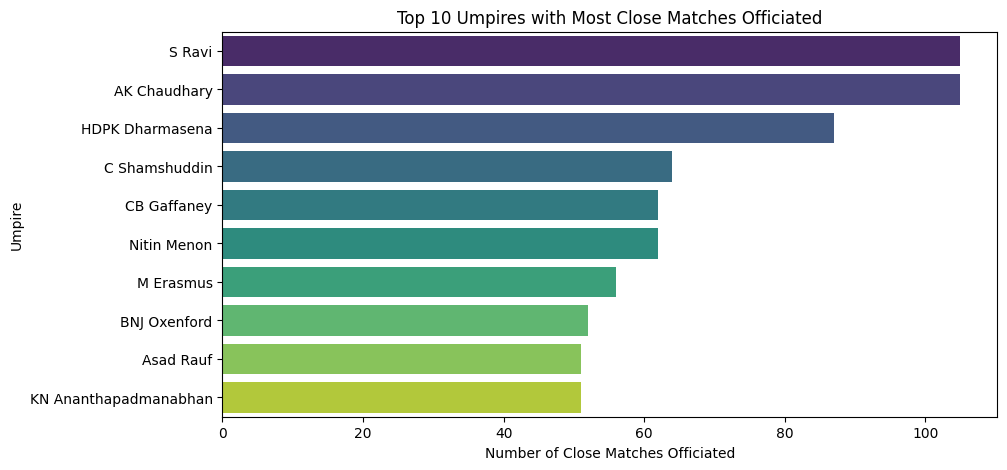

S Ravi                   105
AK Chaudhary             105
HDPK Dharmasena           87
C Shamshuddin             64
CB Gaffaney               62
Nitin Menon               62
M Erasmus                 56
BNJ Oxenford              52
Asad Rauf                 51
KN Ananthapadmanabhan     51
Name: count, dtype: int64

In [32]:
close_matches = IPL_Match[(IPL_Match['Margin'] < 10) | (IPL_Match['Margin'] == 1)]
umpire_impact = pd.concat([IPL_Match['Umpire1'], close_matches['Umpire2']]).value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=umpire_impact.index, x=umpire_impact.values,hue=umpire_impact.index, palette="viridis")
plt.xlabel("Number of Close Matches Officiated")
plt.ylabel("Umpire")
plt.title("Top 10 Umpires with Most Close Matches Officiated")
plt.show()

# Display top umpires in close matches
umpire_impact

***Basic Statistical Analysis***

**Correlation Analysis**

**Measure relationships between variables**

*Winning Margin vs. Toss Decision*

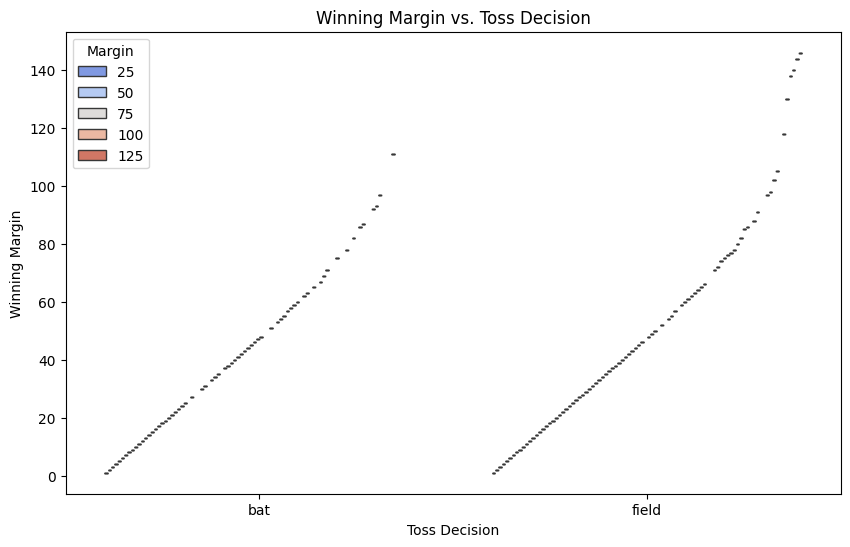

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=IPL_Match["TossDecision"], y=IPL_Match["Margin"],hue=IPL_Match["Margin"], palette="coolwarm")
plt.xlabel("Toss Decision")
plt.ylabel("Winning Margin")
plt.title("Winning Margin vs. Toss Decision")
plt.show()

*Impact of Toss Decision on Match Outcome*

In [34]:
toss_winners_won = (IPL_Match["TossWinner"] == IPL_Match["WinningTeam"]).sum()
toss_losers_won = len(IPL_Match) - toss_winners_won

# Calculating percentages
total_matches = len(IPL_Match)
toss_win_percentage = (toss_winners_won / total_matches) * 100
toss_lose_win_percentage = (toss_losers_won / total_matches) * 100

# Display results
toss_win_percentage, toss_lose_win_percentage

(51.473684210526315, 48.526315789473685)

**Hypothesis Testing**

In [35]:
bat_first_margins = IPL_Match[IPL_Match["TossDecision"] == "bat"]["Margin"]
field_first_margins = IPL_Match[IPL_Match["TossDecision"] == "field"]["Margin"]

# Performing independent T-test
t_stat, p_value_ttest = ttest_ind(bat_first_margins, field_first_margins, equal_var=False)  # Welch's T-test

# Display results
t_stat, p_value_ttest

(-0.5897095350976808, 0.5555477793068335)

In [36]:
# Correlation Analysis: Checking relationships between numerical variables
numerical_cols = ["Margin"]  # Only numerical column available
correlation_matrix = IPL_Match[numerical_cols].corr()

# Display correlation matrix
correlation_matrix

,Margin
Margin,1.0


In [37]:
# Creating a contingency table for Toss Decision vs Winning Team
toss_vs_win = pd.crosstab(IPL_Match["TossDecision"], IPL_Match["WinningTeam"])

# Performing Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(toss_vs_win)

# Display results
chi2_stat, p_value

(42.625716962670246, 0.0005443372421327368)

*Interpret Findings*

***Insights Using Visualization***

**Most successful Team**

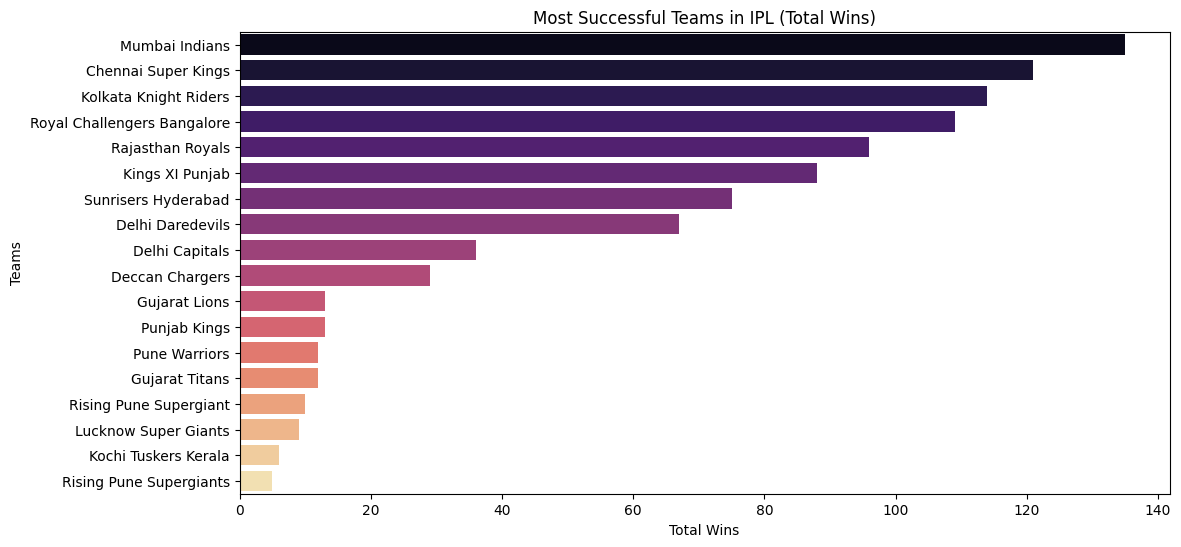

In [39]:
winning_counts = IPL_Match["WinningTeam"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=winning_counts.values, y=winning_counts.index,hue=winning_counts.index, palette="magma")
plt.xlabel("Total Wins")
plt.ylabel("Teams")
plt.title("Most Successful Teams in IPL (Total Wins)")
plt.show()

**Distribution of winning margins**

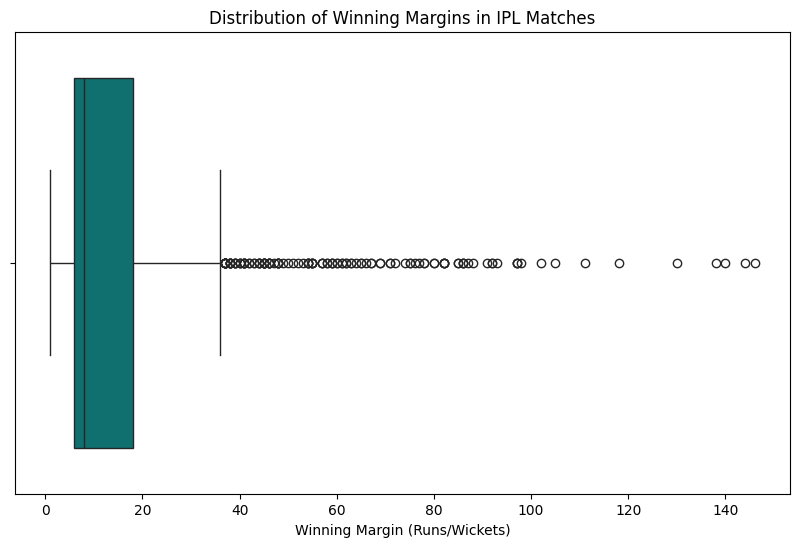

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=IPL_Match["Margin"].dropna(), color="teal")
plt.xlabel("Winning Margin (Runs/Wickets)")
plt.title("Distribution of Winning Margins in IPL Matches")
plt.show()

**Team performance trends over the years**

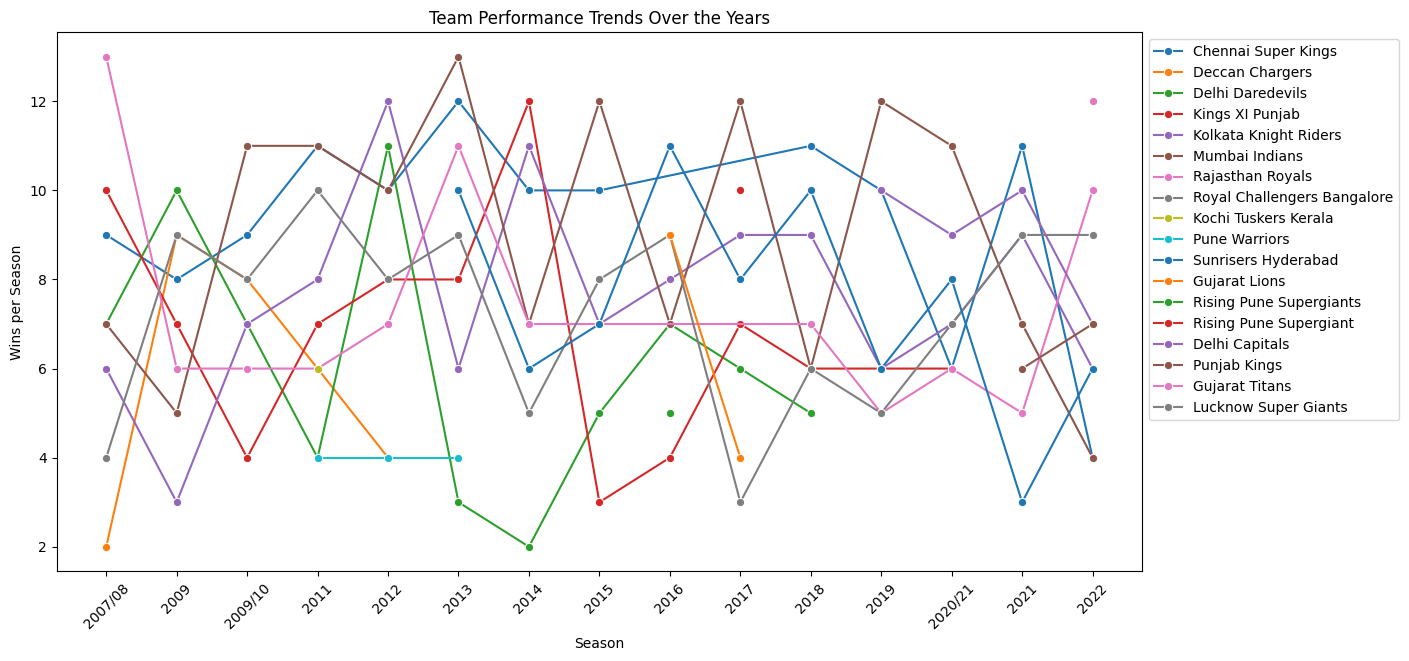

In [41]:
team_wins_by_season = IPL_Match.groupby(["Season", "WinningTeam"]).size().reset_index(name="Wins")

plt.figure(figsize=(14, 7))
sns.lineplot(data=team_wins_by_season, x="Season", y="Wins", hue="WinningTeam", marker="o", palette="tab10")
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Wins per Season")
plt.title("Team Performance Trends Over the Years")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

**Recommendations**

****Documentation****